In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
import os, h5py

In [5]:
size_cut_mpc = "20 Mpc"

s = pynbody.load("../.data/372755.hdf5")
s.physical_units()

print("avaiable types" , s.families())

avaiable types [<Family gas>, <Family dm>, <Family star>, <Family bh>]


In [7]:
s.gas.all_keys()

['u',
 'p',
 'HII',
 'HeIII',
 'ne',
 'rho_ne',
 'dm',
 'cosmodm',
 'redshift',
 'doppler_redshift',
 'em',
 'halpha',
 'c_n_sq',
 'hetot',
 'hydrogen',
 'HI',
 'HIeos',
 'HID12',
 'HeI',
 'HeII',
 'OI',
 'OII',
 'OVI',
 'CIV',
 'NV',
 'SIV',
 'MGII',
 'feh',
 'sixh',
 'sxh',
 'mgxh',
 'oxh',
 'nexh',
 'cxh',
 'caxh',
 'nxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'u_mag',
 'u_lum_den',
 'g_mag',
 'g_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'z_mag',
 'z_lum_den',
 'y_mag',
 'y_lum_den',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',


In [8]:
pynbody.analysis.halo.center(s)

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


<Transformation translate, offset_velocity>

In [9]:
mask = pynbody.filt.Sphere(size_cut_mpc)
s_cut = s.gas[mask]

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/kdtree/__init__.py:352: RuntimeWarning: 

The particles span a region larger than the specified boxsize; disabling periodicity.

For more information about this warning, see the module documentation for KDTree, 
https://pynbody.readthedocs.io/latest/reference/_autosummary/pynbody.kdtree.KDTree.html
  smx = kdmain.nn_start(self.kdtree, int(nn), self.boxsize)


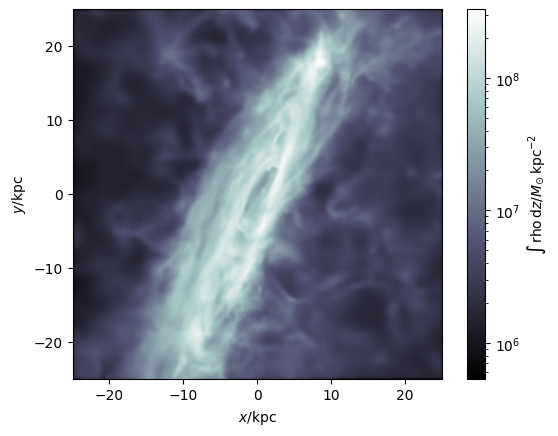

In [10]:
map_out = pynbody.plot.sph.image(
                                  s_cut
                                 , width= str(50)+" kpc"
                                 , qty="rho"
                                 , av_z=None           
                                 , units="Msol kpc^-2"
                                 , resolution=512
                                 , cmap="bone",noplot=False
                                 )


plt.show()

In [11]:
qt = ["x","y","z","mass","rho"]
qt_units = [str(s_cut[x].units) for x in qt]

In [7]:
out_path = ".data/out/gas_illustris_342447_cut"

with h5py.File(f"{out_path}.hdf5", "w") as f:
    for qt, qt_unit in zip(qt, qt_units):
        xx = np.array(s_cut[qt].in_units(qt_unit))
        __ = f.create_dataset(qt, data = xx)

In [8]:
import pandas as pd

In [9]:
qt_units

['kpc', 'kpc', 'kpc', 'Msol', 'Msol kpc**-3']

In [10]:
qt = ["x","y","z","mass","rho"]

In [11]:
df = pd.DataFrame([list(s_cut[x].in_units(y)) for x, y in zip(qt, qt_units)]).transpose()
df.columns = qt

In [12]:
df["size"] = df["mass"]*df["rho"]*0.001

In [13]:
df.dtypes

x       float64
y       float64
z       float64
mass    float64
rho     float64
size    float64
dtype: object

In [14]:
df_export = df[["x","y","z","size","rho"]]

In [15]:
#df.to_feather(".data/out/gas_illustris_342447_cut.lz4")

In [16]:
df_export

,x,y,z,size,rho
0,243.030355,280.255131,-399.214153,2.251767e+07,138120.515625
1,253.028396,286.648372,-398.895211,1.065203e+07,132758.156250
2,241.871390,275.086224,-399.182114,5.644625e+07,605239.937500
3,241.062029,276.019879,-399.072015,9.983501e+06,105371.101562
4,242.327719,275.212106,-399.096523,3.937659e+07,662774.625000
...,...,...,...,...,...
5337692,-72.486674,212.702020,-8.043183,9.413240e+05,9965.785156
5337693,122.287590,152.441488,351.683508,1.746634e+05,2939.275391
5337694,129.294956,230.965124,43.394891,8.537194e+05,10363.108398
5337695,303.644830,369.639039,134.555850,3.434784e+05,6544.646973


In [17]:
df_export.to_csv(".data/out/gas_illustris_342447_cut.csv")

In [28]:
with open(f"{out_path}.ascii", "w") as f:
    f.write(df.to_string(index=False))

In [29]:
# Read the ascii output test

f = pynbody.snapshot.ascii.AsciiSnap(".data/out/gas_illustris_342447_cut.ascii")

In [30]:
f.physical_units()

In [31]:
f["x"]

SimArray([-1.180393, -1.596977, -1.386956, ...,  0.545694, -0.349543,
           0.267881], shape=(642248,), 'kpc')

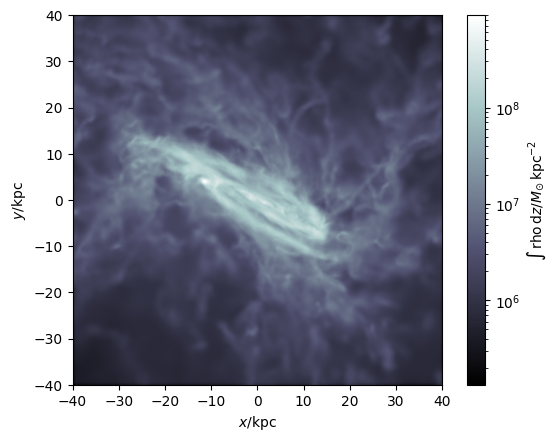

In [32]:
map_out = pynbody.plot.sph.image(
                                f,
                                width= str(80)+" kpc",
                                qty="rho",
                                av_z=None, 
                                units="Msol kpc^-2",
                                resolution=512,
                                cmap="bone",noplot=False,
                                )

plt.show()